# Unsurpervised Learning Algorithm : 

In [35]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch as Patch
import numpy as np
import pandas as pd
import time
import os
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler 

sns.set()

In [36]:
outdir = './data/processed_data'
if not os.path.exists(outdir):
    os.mkdir(outdir)

In [37]:
insurance_df = pd.read_csv('data/car_insurance_train.csv')
insurance_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [38]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

## Cleanup Data

In [39]:
insurance_df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [40]:
insurance_df.duplicated().sum()

0

In [41]:
insurance_df['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [42]:
insurance_df.drop(["policy_id"],axis=1,inplace=True)

In [43]:
insurance_data_cat = []
insurance_data_num = []

for i in insurance_df.columns:
    column_dtype = insurance_df[i].dtype
    
    if column_dtype == 'object':
        insurance_data_cat.append(i)
    else:
        insurance_data_num.append(i)

In [44]:
len(insurance_data_cat)

27

In [45]:
len(insurance_data_num)

16

In [46]:
insurance_df.loc[:,insurance_data_cat]

,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,C1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
1,C2,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
2,C3,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
3,C4,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Yes,Yes,No,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,C5,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,C8,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
58588,C14,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58589,C5,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58590,C8,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [55]:
insurance_df.dtypes

policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object
gear_box                        

In [56]:

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

insurance_df["engine_type"]=label_encoder.fit_transform(insurance_df["engine_type"])
insurance_df["area_cluster"]=label_encoder.fit_transform(insurance_df["area_cluster"])
insurance_df["model"]=label_encoder.fit_transform(insurance_df["model"])
insurance_df["steering_type"]=label_encoder.fit_transform(insurance_df["steering_type"])
insurance_df["rear_brakes_type"]=label_encoder.fit_transform(insurance_df["rear_brakes_type"])
insurance_df["transmission_type"]=label_encoder.fit_transform(insurance_df["transmission_type"])
insurance_df["segment"]=label_encoder.fit_transform(insurance_df["segment"])
insurance_df["fuel_type"]=label_encoder.fit_transform(insurance_df["fuel_type"])

In [59]:
insurance_data_cat

['area_cluster',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [61]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

insurance_data_cat = insurance_df[['is_esc' , 'is_adjustable_steering'  , 'is_tpms' , 'is_parking_sensors' , 
              'is_parking_camera' , 'is_front_fog_lights',
              'is_rear_window_wiper', 'is_rear_window_washer',
              'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
              'is_central_locking', 'is_power_steering',
              'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
              'is_ecw', 'is_speed_alert']]

insurance_data_cat_encoded = ordinal_encoder.fit_transform(insurance_data_cat)

In [63]:
insurance_df.drop(['is_esc' , 'is_adjustable_steering'  , 'is_tpms' , 'is_parking_sensors' , 
              'is_parking_camera'  , 'is_front_fog_lights',
              'is_rear_window_wiper', 'is_rear_window_washer',
              'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
              'is_central_locking', 'is_power_steering',
              'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
              'is_ecw', 'is_speed_alert'], axis =1, inplace = True)

In [64]:
insurance_df[['is_esc' , 'is_adjustable_steering'  , 'is_tpms' , 'is_parking_sensors' , 
              'is_parking_camera' , 'is_front_fog_lights',
              'is_rear_window_wiper', 'is_rear_window_washer',
              'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
              'is_central_locking', 'is_power_steering',
              'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
              'is_ecw', 'is_speed_alert']] = insurance_data_cat_encoded

In [96]:
from sklearn.model_selection import train_test_split

X = insurance_df.drop(['is_claim','max_torque','max_power'], axis=1)
y = insurance_df['is_claim']

X_train, X_test, y_train_true, y_test_true = train_test_split(X, y, test_size=0.2)

X_train.to_csv( os.path.join(outdir,f"insurance_data_train.csv" ),index=False)
X_test.to_csv( os.path.join(outdir,f"insurance_data_test.csv" ),index=False)
y_train_true.to_csv( os.path.join(outdir,f"insurance_data_train_labels.csv" ),index=False)
y_test_true.to_csv( os.path.join(outdir,f"insurance_data_test_labels.csv" ),index=False)

In [67]:
insurance_df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,60Nm@3500rpm,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.672619,0.02,0.375000,11,27003,1,0,0,0,60Nm@3500rpm,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.841110,0.02,0.384615,15,4076,1,0,0,0,60Nm@3500rpm,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.900277,0.11,0.432692,16,21622,1,3,3,2,113Nm@4400rpm,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.596403,0.11,0.634615,17,34738,2,0,4,2,91Nm@4250rpm,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


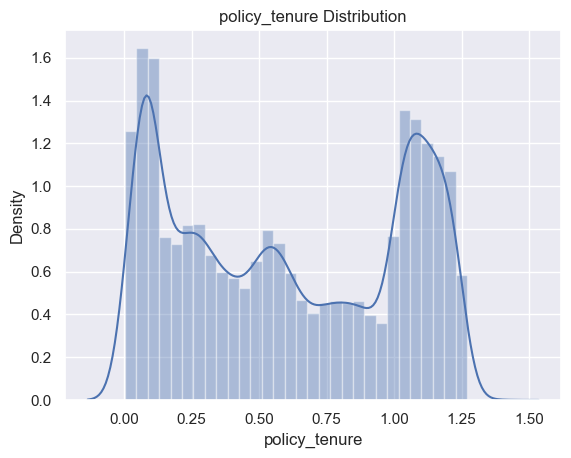

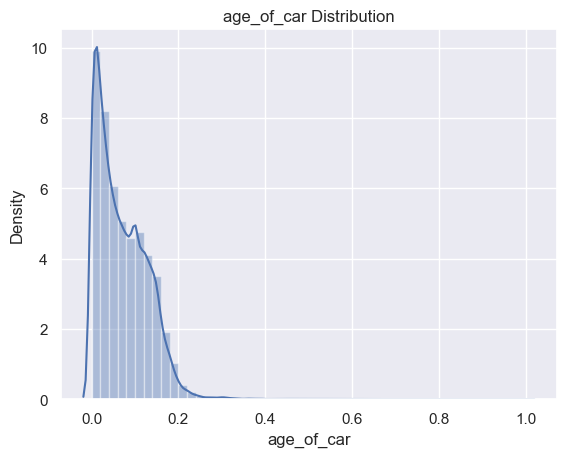

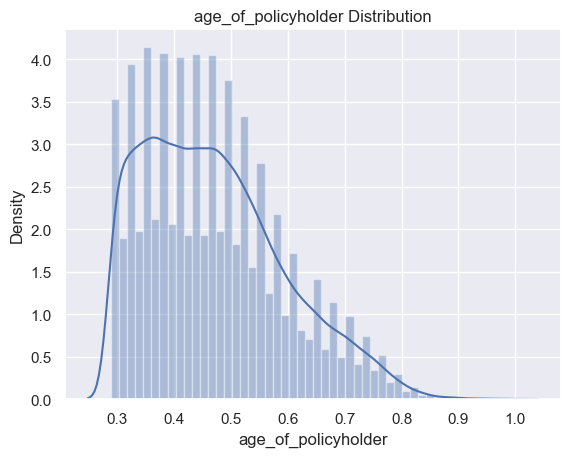

<Figure size 640x480 with 0 Axes>

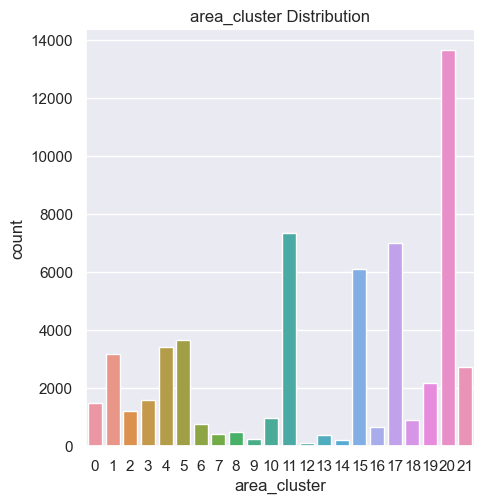

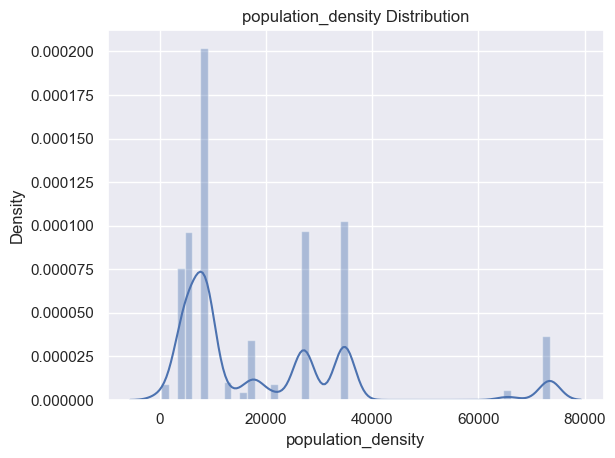

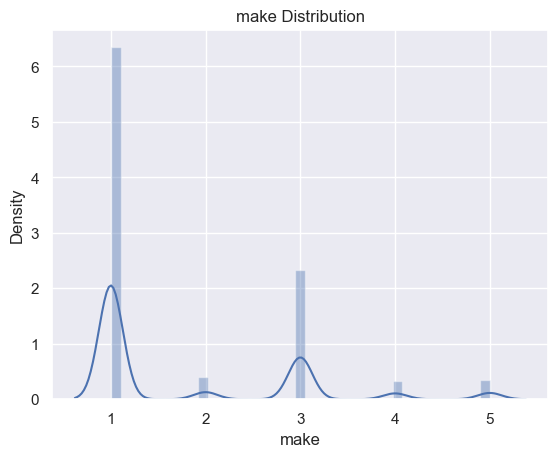

<Figure size 640x480 with 0 Axes>

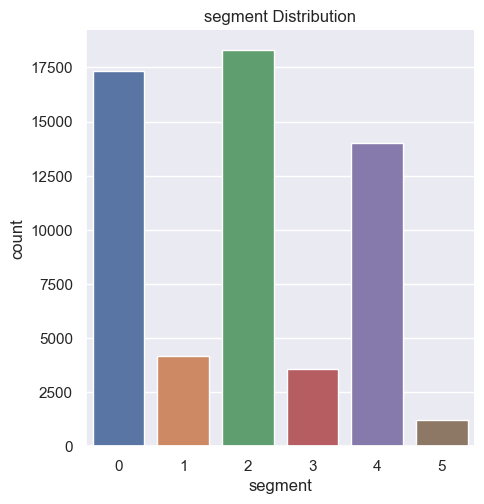

<Figure size 640x480 with 0 Axes>

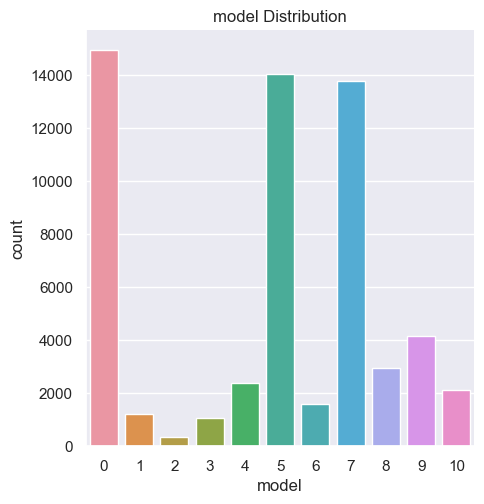

<Figure size 640x480 with 0 Axes>

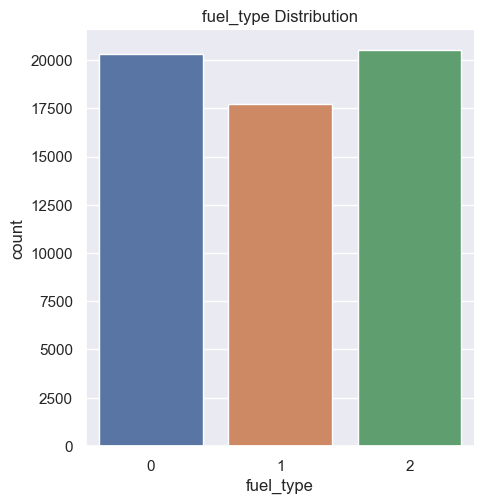

<Figure size 640x480 with 0 Axes>

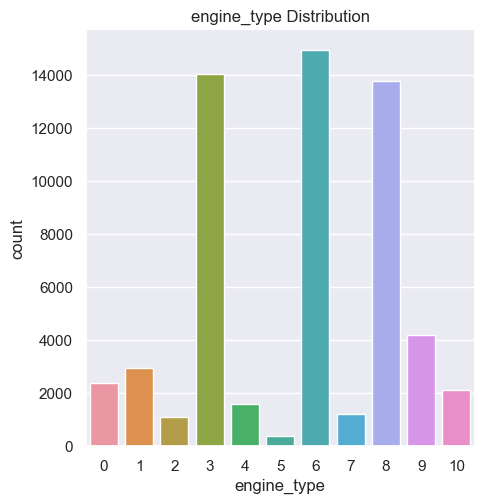

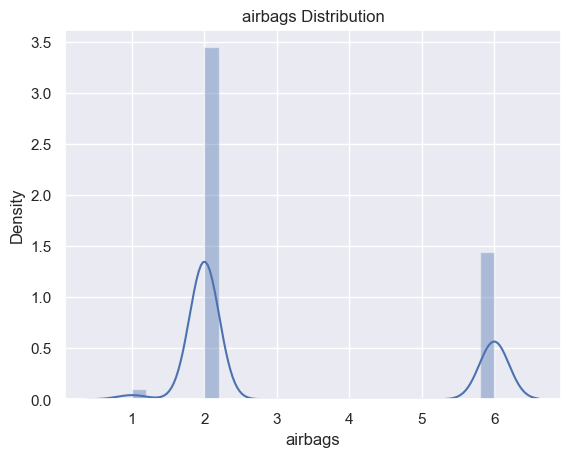

<Figure size 640x480 with 0 Axes>

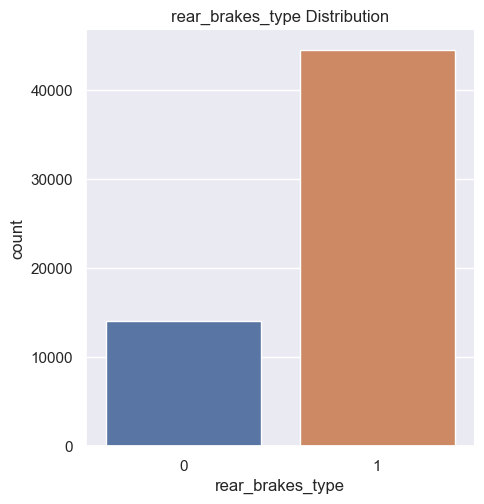

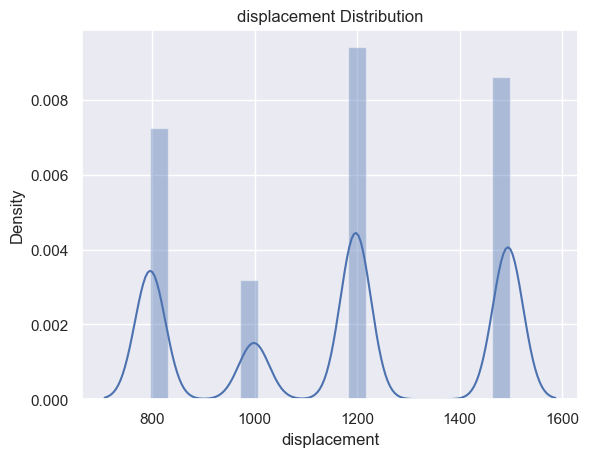

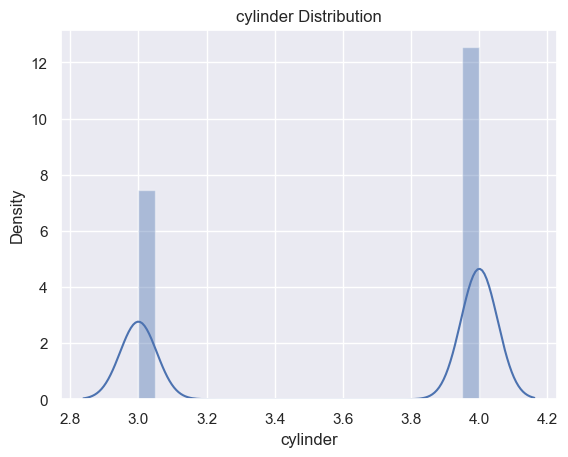

<Figure size 640x480 with 0 Axes>

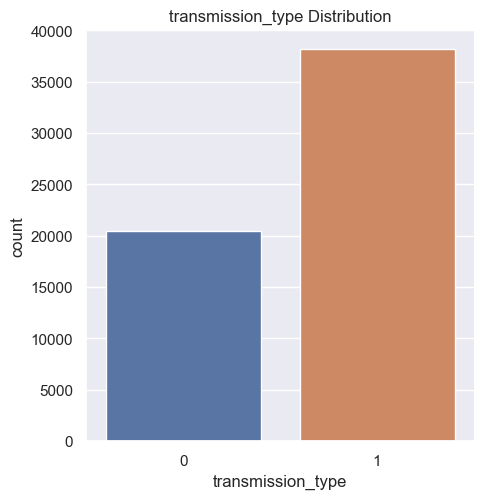

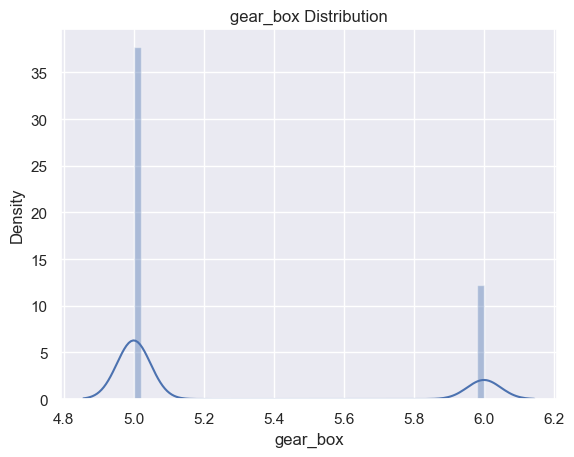

<Figure size 640x480 with 0 Axes>

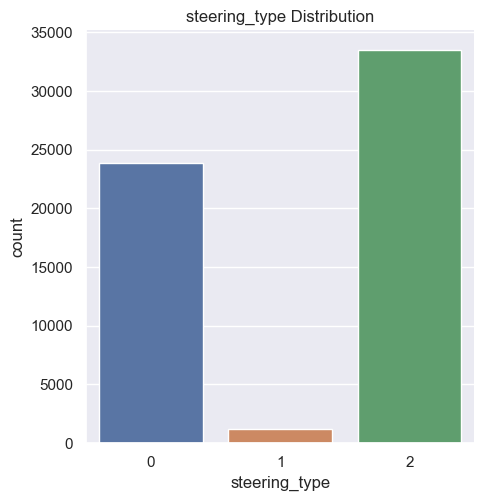

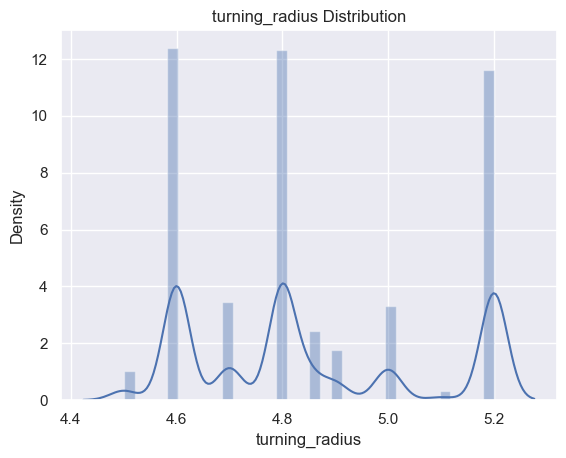

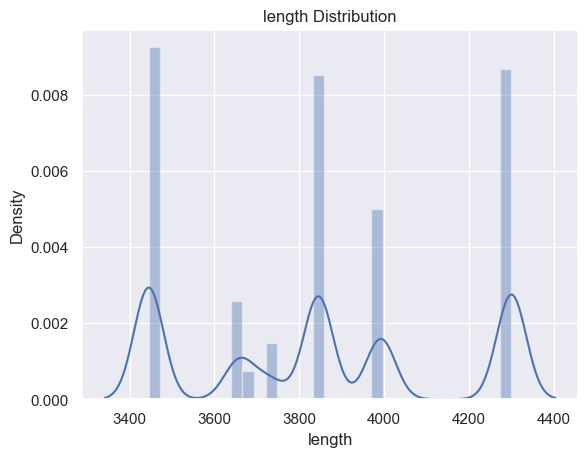

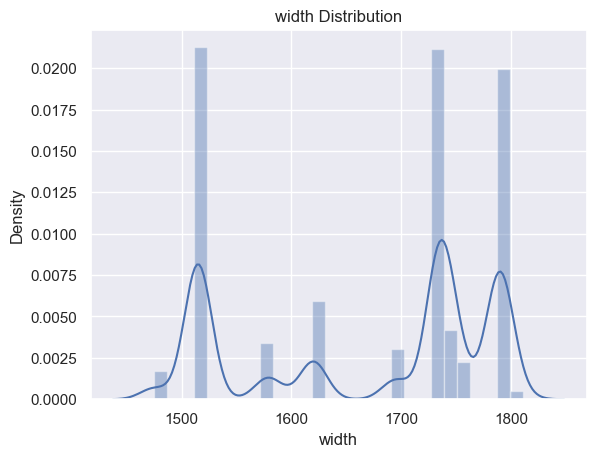

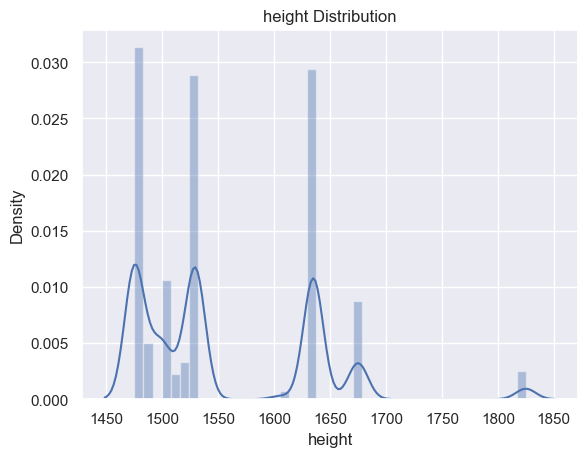

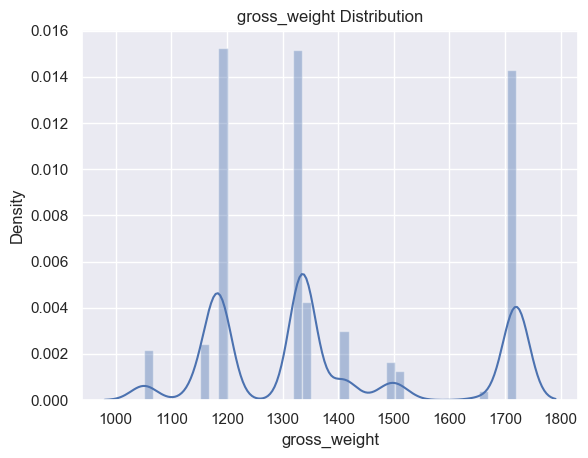

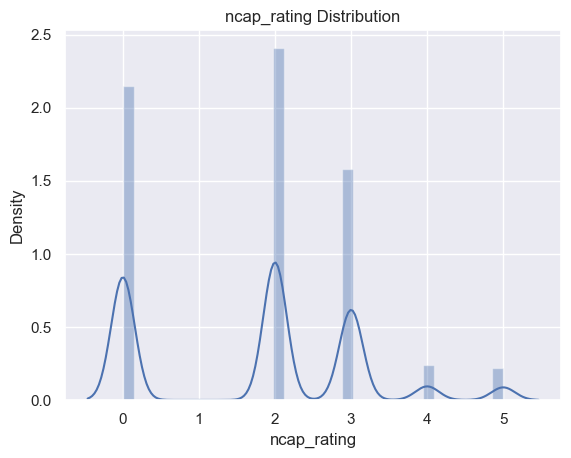

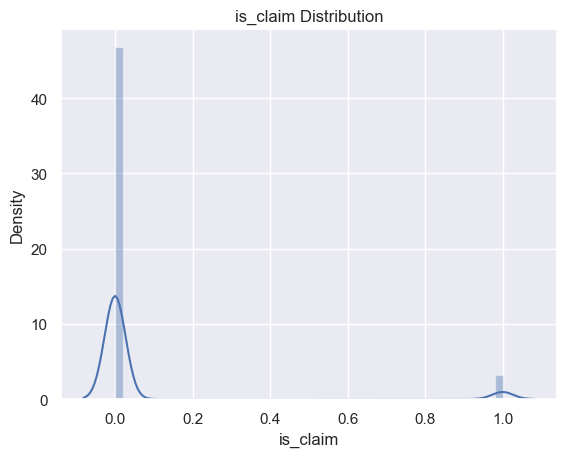

<Figure size 640x480 with 0 Axes>

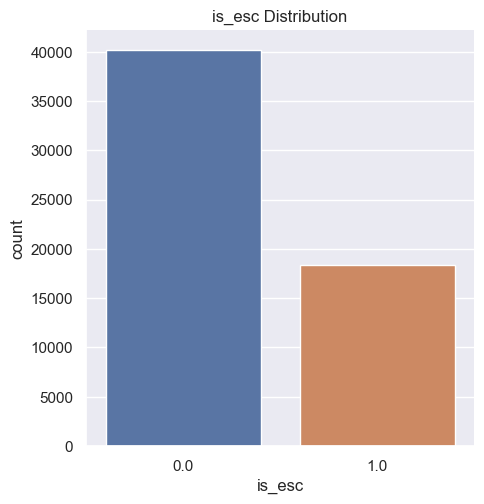

<Figure size 640x480 with 0 Axes>

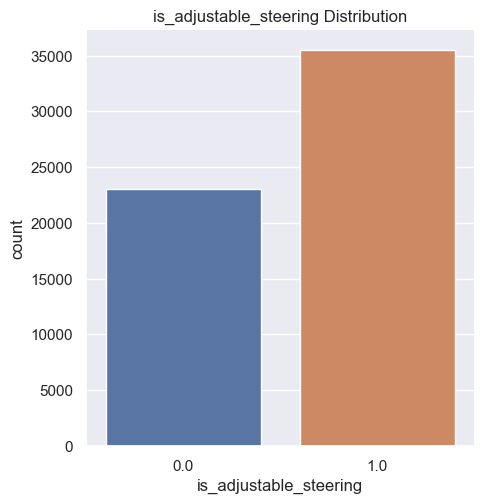

<Figure size 640x480 with 0 Axes>

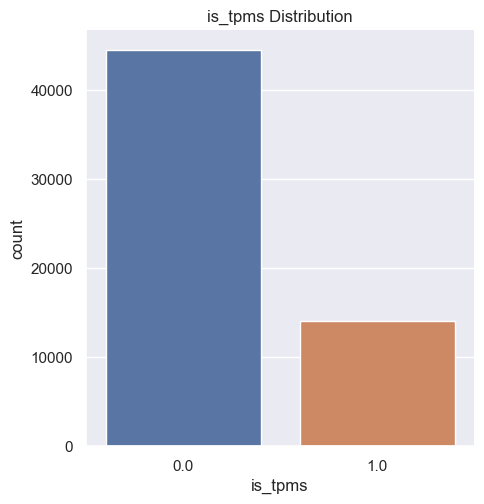

<Figure size 640x480 with 0 Axes>

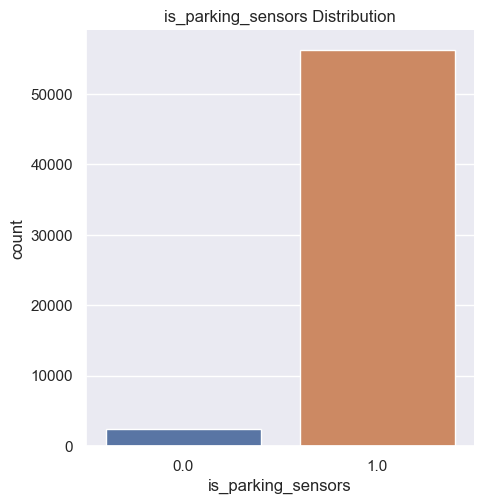

<Figure size 640x480 with 0 Axes>

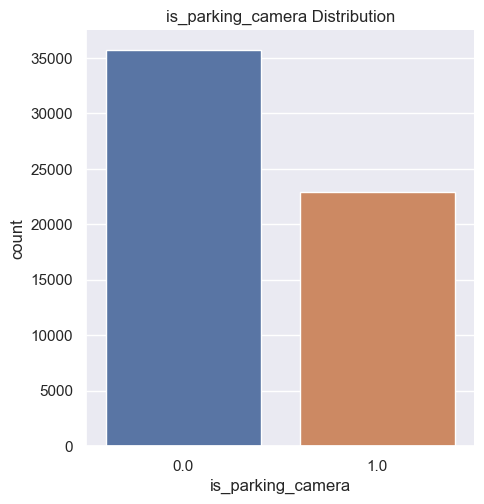

<Figure size 640x480 with 0 Axes>

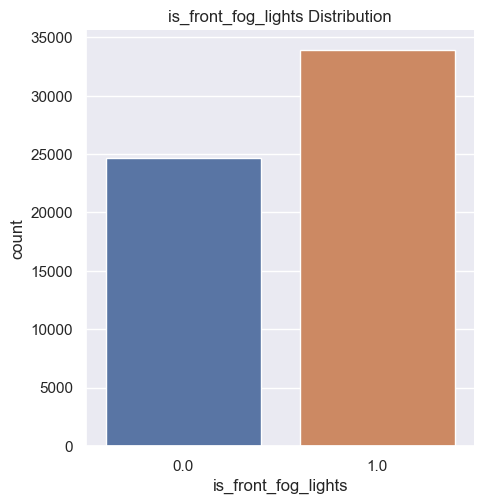

<Figure size 640x480 with 0 Axes>

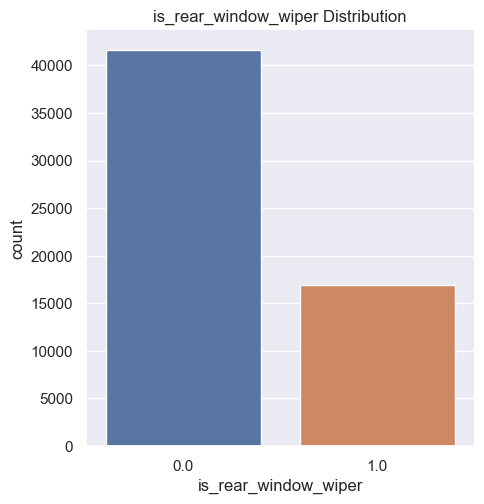

<Figure size 640x480 with 0 Axes>

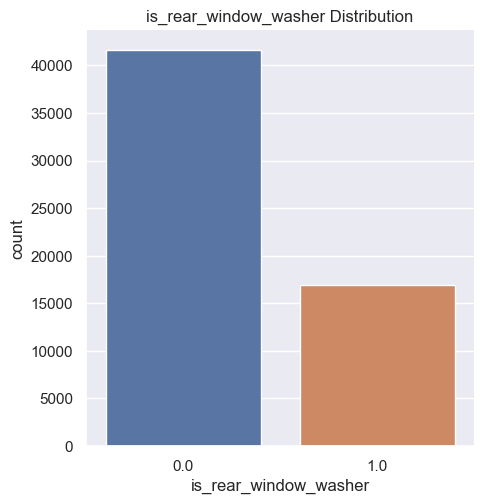

<Figure size 640x480 with 0 Axes>

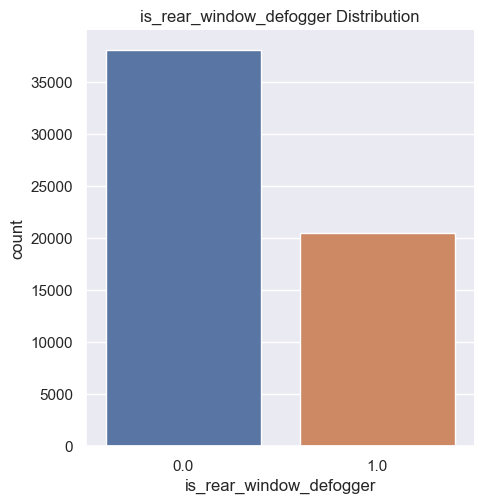

<Figure size 640x480 with 0 Axes>

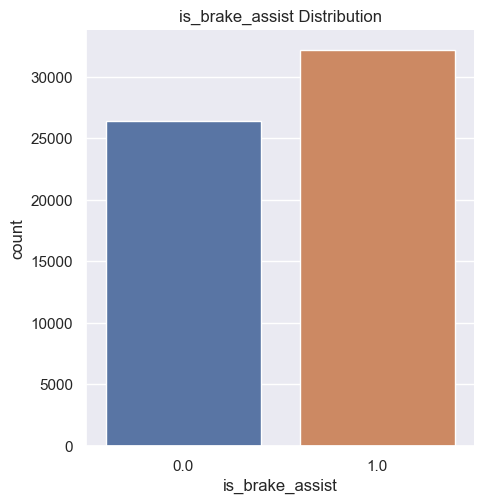

<Figure size 640x480 with 0 Axes>

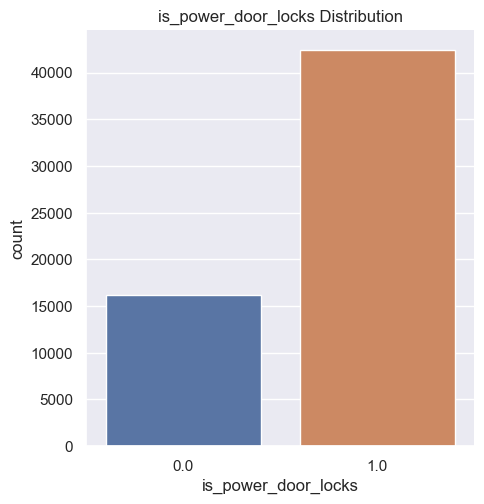

<Figure size 640x480 with 0 Axes>

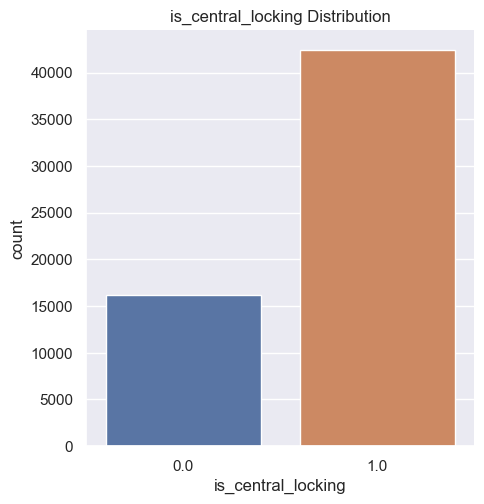

<Figure size 640x480 with 0 Axes>

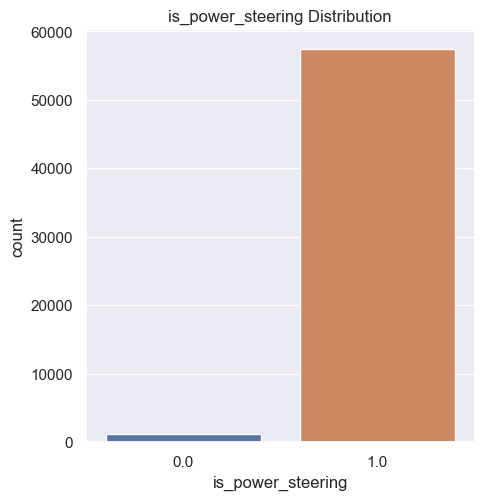

<Figure size 640x480 with 0 Axes>

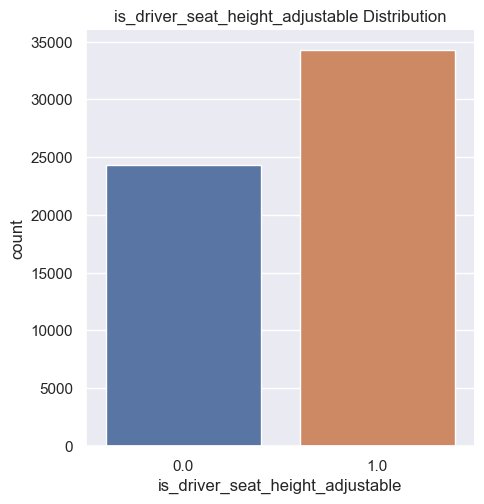

<Figure size 640x480 with 0 Axes>

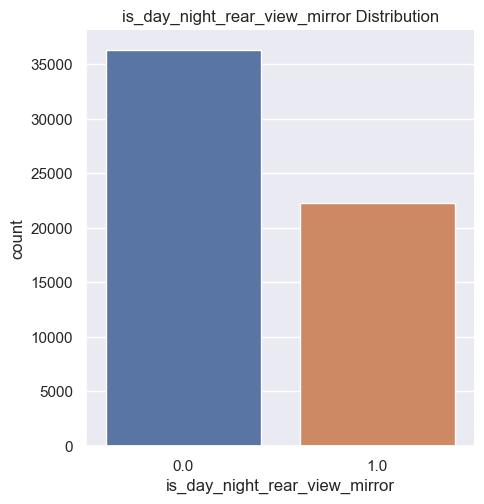

<Figure size 640x480 with 0 Axes>

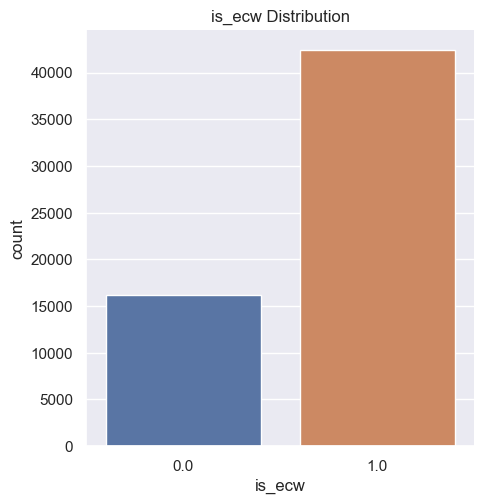

<Figure size 640x480 with 0 Axes>

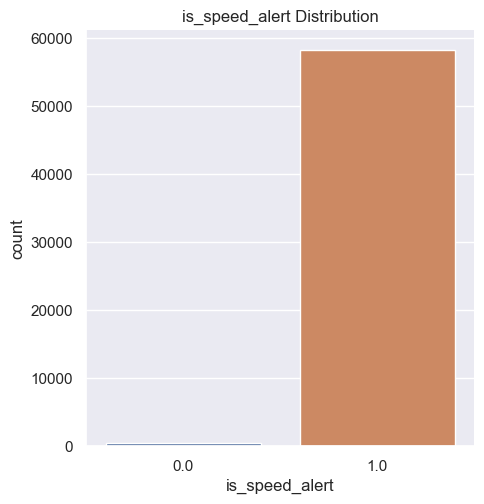

In [66]:
# Visualize the distribution of each variable.
#plt.figure(figsize=(20,20))
for i, j in enumerate(insurance_df.describe().columns):
    #plt.subplot(11,2, i+1)
    plt.figure()
    if (j in insurance_data_num):
        sns.distplot(x=insurance_df[j])
    else:
        sns.catplot(x=j, kind="count", data=insurance_df)
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    # plt.subplots_adjust(wspace=.2, hspace=.5)
    #plt.tight_layout()
    plt.show()

In [49]:
insurance_df.describe().T.style.background_gradient(cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.000000,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.000000,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.000000,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.000000,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.000000,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.000000,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.000000,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.000000,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.000000,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.000000,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


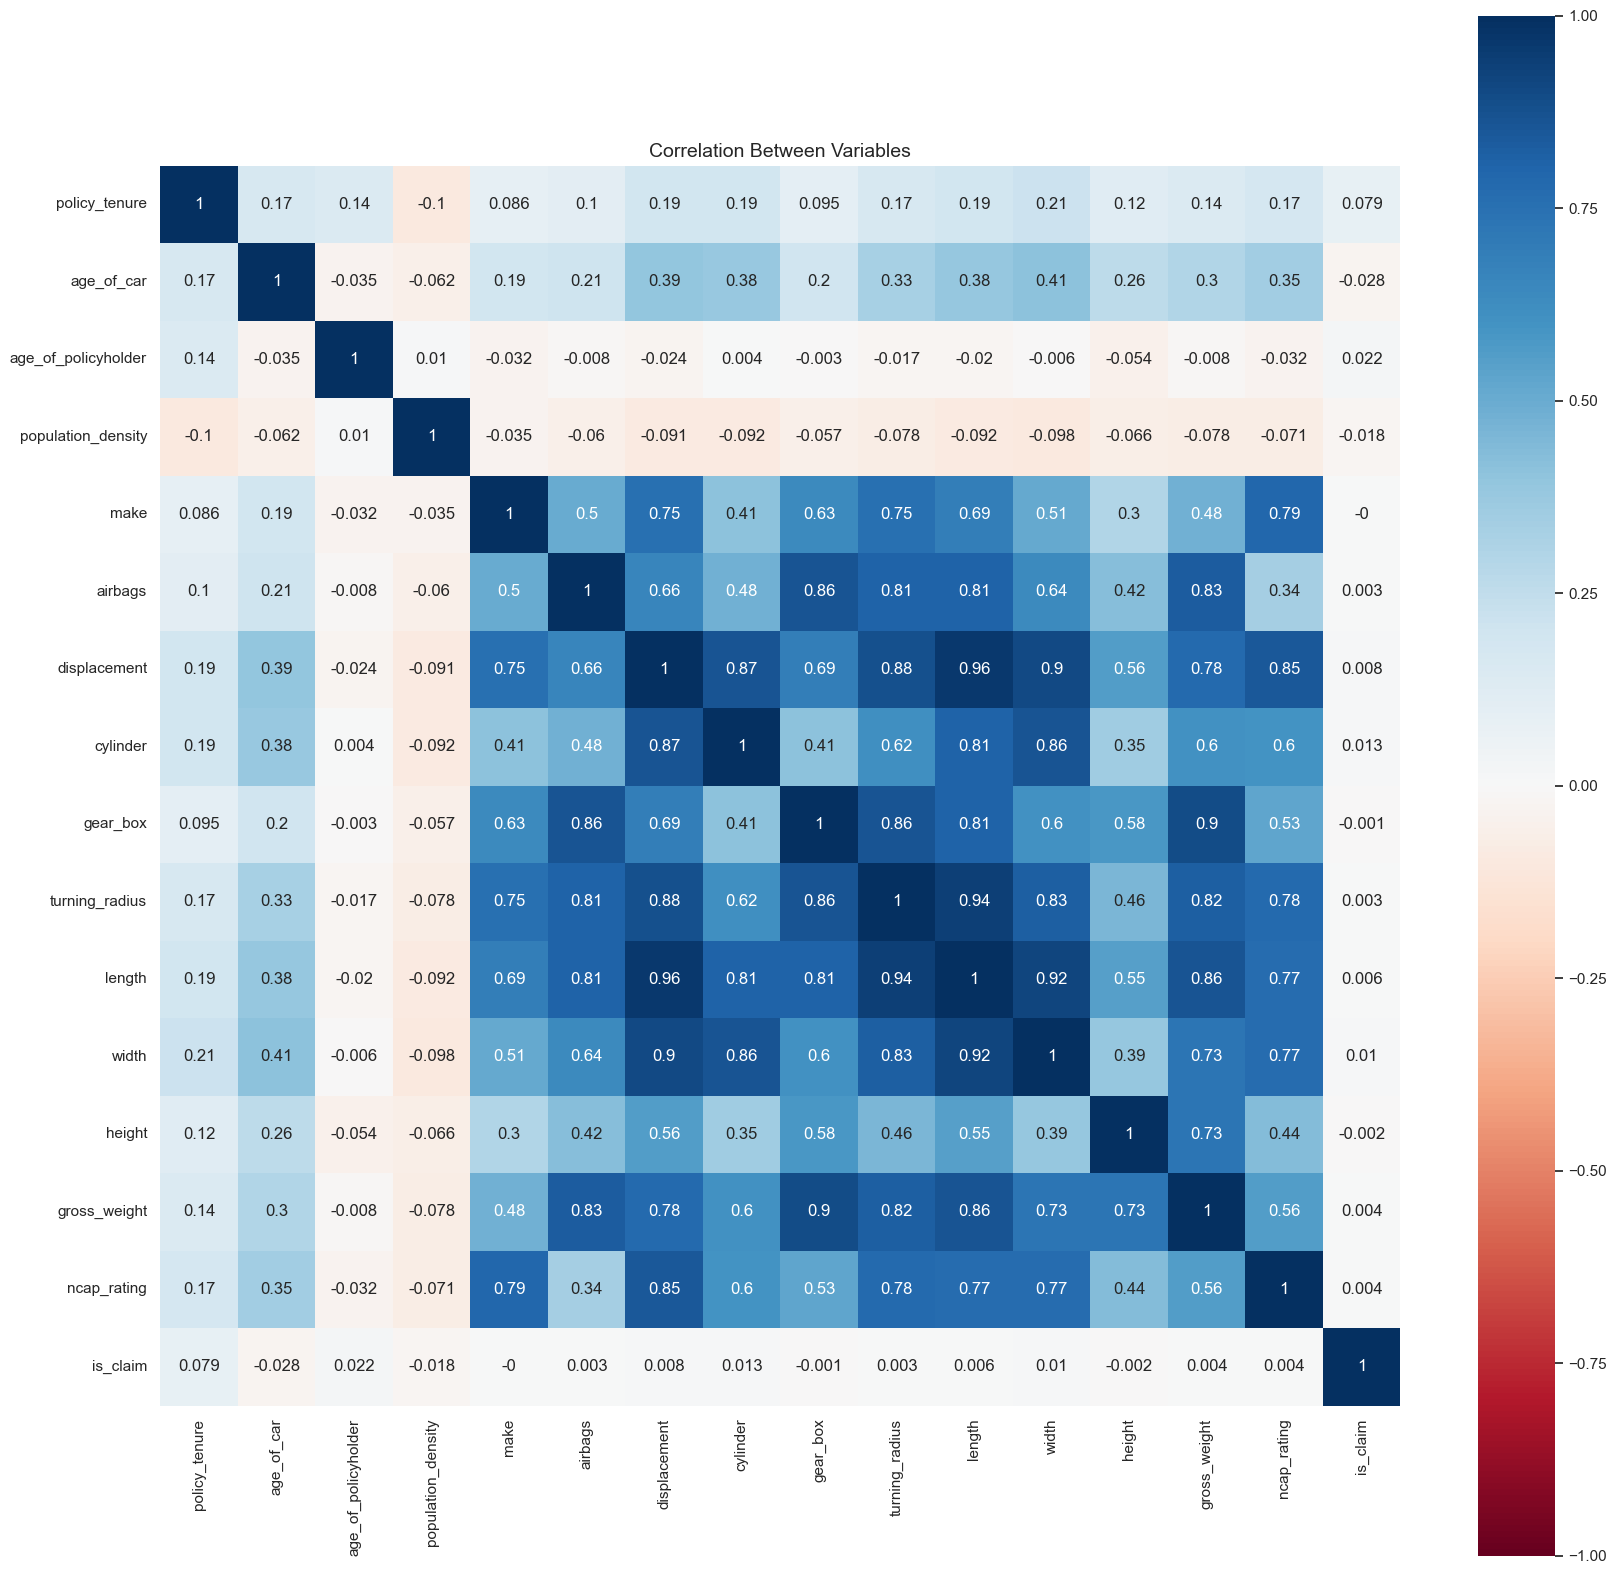

In [50]:
correlation_metrics=insurance_df.corr().round(3)
fig = plt.figure(figsize=(20,20))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

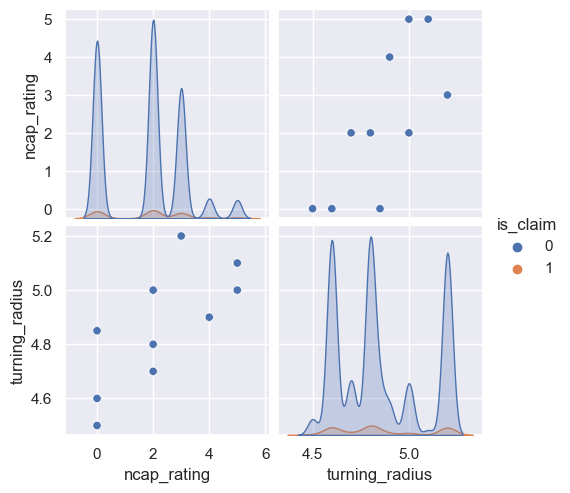

In [72]:
sns.pairplot(insurance_df, vars=["ncap_rating","turning_radius"], hue="is_claim")

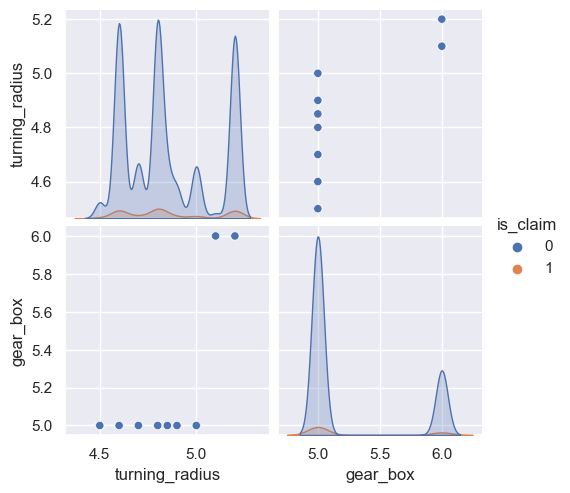

In [94]:
sns.pairplot(insurance_df, vars=["turning_radius","gear_box"], hue="is_claim")

In [183]:
#list for cols to scale
#cols_to_scale = ['BMI','GenHlth','MentHlth','Education','Age','Income']

#create and fit scaler
#scaler = StandardScaler()
#scaler.fit(diabetes_df[cols_to_scale])

#scale selected data
#diabetes_df[cols_to_scale] = scaler.transform(diabetes_df[cols_to_scale])

In [184]:
#correlation_metrics=diabetes_df.corr().round(3)
#fig = plt.figure(figsize=(20,20))
#sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
#plt.title('Correlation Between Variables', size=14)

#plt.show()

In [186]:
# Visualize the distribution of each variable.
#plt.figure(figsize=(20,20))
#for i, j in enumerate(diabetes_df.describe().columns):
    #plt.subplot(11,2, i+1)
 #   plt.figure()
 #   if (j == 'BMI'):
 #       sns.distplot(x=diabetes_df[j])
 #   else:
 #       sns.catplot(x=j, kind="count", data=diabetes_df)
 #   plt.xlabel(j)
 #   plt.title('{} Distribution'.format(j))
 #   # plt.subplots_adjust(wspace=.2, hspace=.5)
 #   #plt.tight_layout()
 #   plt.show()

<Axes: xlabel='population_density', ylabel='policy_tenure'>

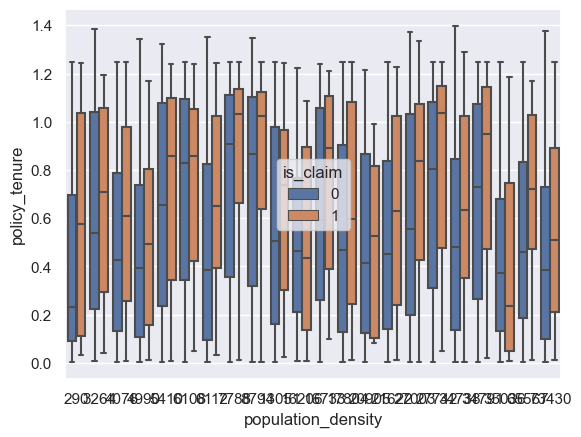

In [93]:
sns.boxplot(insurance_df, x='str', y='',hue='is_claim')